# 1. 확률 경사하강법

# 1.1 SGDCallssfier

In [2]:
import pandas as pd

In [20]:
fish=pd.read_csv("fish.csv")
fush_input=fish[["Weight","Length","Diagonal","Height","Width"]].to_numpy()
fush_taget=fish["Species"].to_numpy()

In [29]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fush_input, fush_taget, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [42]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\KOREAIT\anaconda3\envs\pt3prer32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# 1.2에스포크와 과대/과소적합

In [37]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [38]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

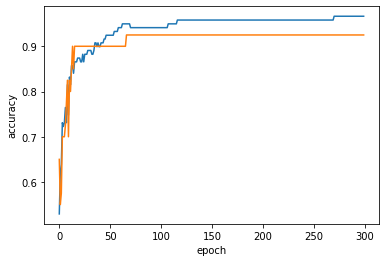

In [50]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()
# 데이터를 많은 처리하기 CPu을

In [46]:
sc = SGDClassifier(loss='log_loss', max_iter=100,tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [49]:
sc = SGDClassifier(loss='hinge', max_iter=100,tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
